In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [13]:
# 构建模型

class SimpleModel(torch.nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear1 = torch.nn.Linear(8, 4)
        self.linear2 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        return x


class SimpleDataset(Dataset):
    def __init__(self):
        filename = "../data/diabetes.csv"
        loadtxt = np.loadtxt(filename, delimiter=",", dtype=np.float32)
        self.len = loadtxt.shape[0]
        self.data = loadtxt[:, 0:-1]
        self.label = loadtxt[:, -1].reshape(self.len, 1)

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return self.len

In [21]:
mydataset = SimpleDataset()
bs = 300
loader = DataLoader(dataset=mydataset, shuffle=True, batch_size=bs, num_workers=0)


In [1]:
model = SimpleModel()
bce_loss = torch.nn.BCELoss(size_average=True)
sgd = torch.optim.SGD(model.parameters(), lr=0.01)
epoch = 10
loss_history = []
for i in range(epoch):
    loss_item = 0
    for index, data in enumerate(loader):
        data, labels = data
        prediction = model.forward(data)
        loss = bce_loss(prediction, labels)
        loss_item = loss.item()
        sgd.zero_grad()
        loss.backward()
        sgd.step()
    loss_history.append(loss_item)

NameError: name 'SimpleModel' is not defined

In [23]:
train_cnt = np.linspace(1, epoch, epoch)
print(loss_history)

[0.9476982355117798, 0.8882648944854736, 0.8502120971679688, 0.8872195482254028, 0.8557078838348389, 0.81144779920578, 0.8212882280349731, 0.8010920286178589, 0.8093207478523254, 0.8398807048797607, 0.794275164604187, 0.7824175953865051, 0.7890160083770752, 0.7855997681617737, 0.7822883129119873, 0.7800071239471436, 0.7657170295715332, 0.7613628506660461, 0.7327322363853455, 0.736044704914093, 0.7501649856567383, 0.7591204643249512, 0.7450805902481079, 0.7454798817634583, 0.7259888648986816, 0.7415851950645447, 0.7267769575119019, 0.7317245602607727, 0.729951024055481, 0.7287402153015137, 0.7316176295280457, 0.725100576877594, 0.7092283368110657, 0.7207680940628052, 0.7116673588752747, 0.7365661859512329, 0.7054293751716614, 0.7255716919898987, 0.7118843793869019, 0.7288686037063599, 0.711458683013916, 0.7231960296630859, 0.7296043634414673, 0.7085549235343933, 0.7076451182365417, 0.7200692296028137, 0.6912236213684082, 0.7156595587730408, 0.6939295530319214, 0.7026074528694153, 0.6955

Text(0, 0.5, 'loss')

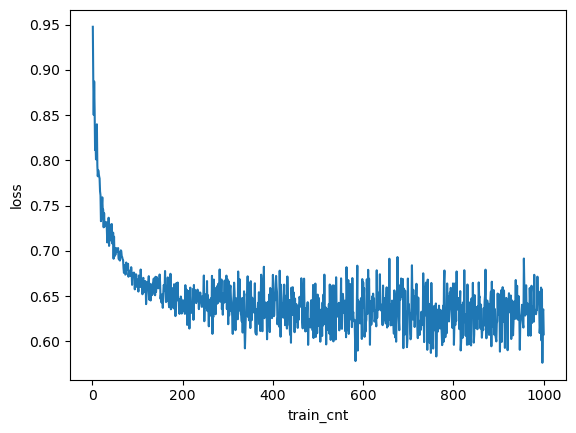

In [24]:
plt.plot(train_cnt, loss_history)
plt.xlabel("train_cnt")
plt.ylabel("loss")

"""
当使用mini-batch梯度下降进行训练时，损失值可能会出现波动，这是正常的。这是因为mini-batch梯度下降是一种随机梯度下降方法，它在每个时间步只使用一小部分数据来更新模型权重。因此，损失值的变化可能会受到随机性的影响，导致损失值在训练过程中出现波动。

为了减少损失值的波动，你可以尝试以下方法：

1. 增加mini-batch大小：较大的mini-batch可以减少随机性的影响，从而使损失值更加平滑。但是，较大的mini-batch可能会导致内存不足或计算速度较慢。

2. 使用学习率调度：学习率调度是一种在训练过程中动态调整学习率的方法。通过逐渐降低学习率，可以使模型在训练过程中更加平滑地收敛。

3. 使用动量或Adam等优化算法：这些优化算法可以帮助模型更快地收敛，同时减少损失值的波动。

4. 增加训练轮数：训练更多的轮数可以帮助模型更好地收敛，从而减少损失值的波动。

5. 正则化：通过在损失函数中添加正则化项，可以防止模型过拟合，从而减少损失值的波动。

请注意，这些方法可能会影响模型的性能和收敛速度。因此，在尝试这些方法时，请确保仔细评估模型的性能和收敛速度，以确保获得最佳结果。
"""